In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [16,8]

In [3]:
img = plt.imread('image.jpeg')
print(img.shape)

(667, 1000, 3)


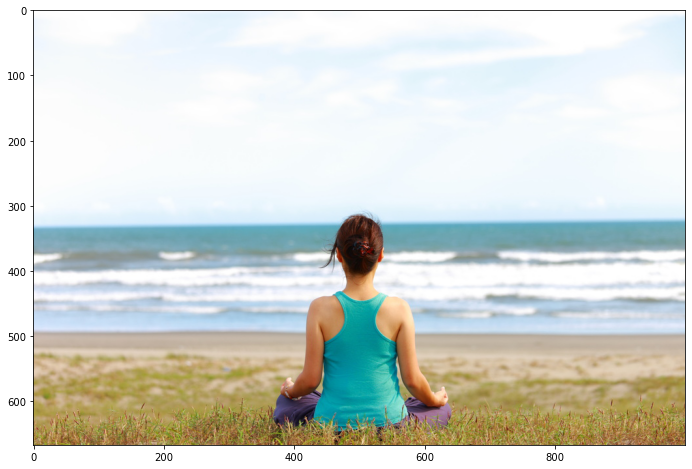

In [5]:
plt.imshow(img)

In [6]:
gray = np.mean(img,-1) # converting rgb to grayscale 
print(gray.shape)

(667, 1000)


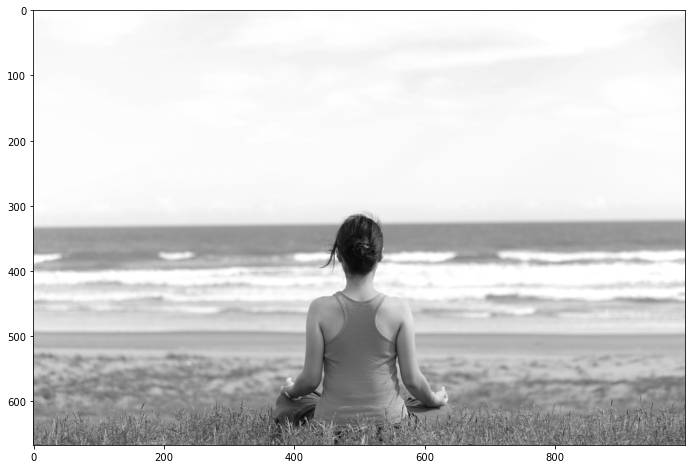

In [10]:
plt.imshow(gray,cmap='gray')

In [12]:
# Applying SVD on image 
U,S,Vt = np.linalg.svd(gray,full_matrices=False)
S = np.diag(S)

In [14]:
print('Orig shape of image - ',gray.shape)
print('Shape of U matrix - ',U.shape)
print('Shape of S matrix - ',S.shape)
print('Shape of Vt -', Vt.shape)

Orig shape of image -  (667, 1000)
Shape of U matrix -  (667, 667)
Shape of S matrix -  (667, 667)
Shape of Vt - (667, 1000)


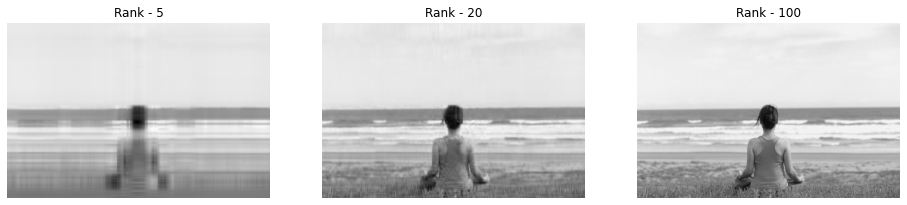

In [28]:
fig,ax = plt.subplots(1,3)
ranks = [5,20,100]
for i in range(3):
    rank = ranks[i]
    X_approx = U[:,:rank] @ S[:rank,:rank] @ Vt[:rank,:]
    ax[i].imshow(X_approx,cmap='gray')
    ax[i].axis('off')
    ax[i].set_title('Rank - ' + str(rank))

Text(0, 0.5, 'log of sigma value ')

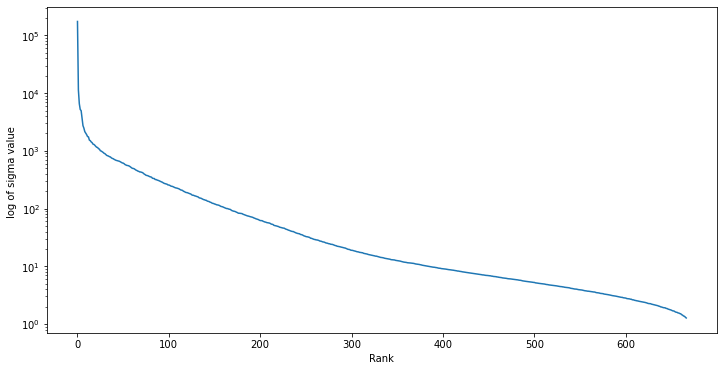

In [36]:
plt.figure(figsize=(12,6))
plt.semilogy(np.diag(S))
plt.xlabel('Rank')
plt.ylabel('log of sigma value ')

Text(0.5, 0, 'Rank')

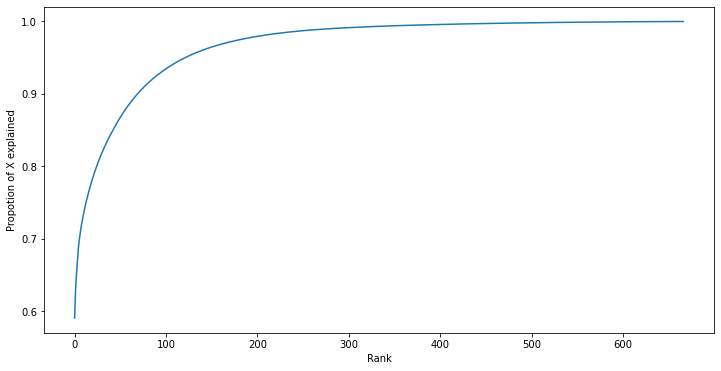

In [40]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(np.diag(S)) / np.sum(S))
plt.ylabel('Propotion of X explained')
plt.xlabel('Rank')

We can see that even at 100 rank, more than 90% of the information is captured. 